# Clase IV
4.1 Descomposicion SVD  

In [1]:
!git clone https://github.com/rollervan/FunMat.git temp
!cp -r ./temp/Codes/Images ./
!rm -rf ./temp

Cloning into 'temp'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 130 (delta 36), reused 118 (delta 26), pack-reused 0
Receiving objects: 100% (130/130), 12.62 MiB | 4.31 MiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *
from sympy.matrices.expressions.factorizations import svd

from IPython.display import Math, display, Latex


In [3]:
A = np.array([[1, 1],
              [1, 0],
              [0, 1]])
display(Matrix(A))

# calculo matrices simetricas asociadas
ATA = np.matmul(A.transpose(), A)
AAT = np.matmul(A, A.transpose())

display(Latex('$A^t A$'))
display(Matrix(ATA))
display(Latex('$AA^t$'))
display(Matrix(AAT))

# calculo descomposicion SVD
U, S, V = np.linalg.svd(A)

# almaceno los valores singulares
D = S
print('D')
display(Matrix(D))

# # calculo autovalores y autovectores de las matrices simetricas
D1, V1 = np.linalg.eig(ATA)
print('D1')
display(Matrix(D1))
print('V1')
display(Matrix(V1))

D2, U1 = np.linalg.eig(AAT)
print('D2')
display(Matrix(D2))
print('U1')
display(Matrix(U1))

# descomposicion
u1=U[:,0]
print('u1')
display(Matrix(u1))

u2=U[:,1]
print('u2')
display(Matrix(u2))

v1=V[:,0]
print('v1')
display(Matrix(v1))

v2=V[:,1]
print('v2')
display(Matrix(v2))

Matrix([
[1, 1],
[1, 0],
[0, 1]])

<IPython.core.display.Latex object>

Matrix([
[2, 1],
[1, 2]])

<IPython.core.display.Latex object>

Matrix([
[2, 1, 1],
[1, 1, 0],
[1, 0, 1]])

D


Matrix([
[1.73205080756888],
[             1.0]])

D1


Matrix([
[3.0],
[1.0]])

V1


Matrix([
[0.707106781186547, -0.707106781186547],
[0.707106781186547,  0.707106781186547]])

D2


Matrix([
[                  3.0],
[-2.91433543964104e-16],
[                  1.0]])

U1


Matrix([
[-0.816496580927726, -0.577350269189626, -1.57009245868377e-16],
[-0.408248290463863,  0.577350269189626,    -0.707106781186547],
[-0.408248290463863,  0.577350269189626,     0.707106781186548]])

u1


Matrix([
[-0.816496580927726],
[-0.408248290463863],
[-0.408248290463863]])

u2


Matrix([
[1.85577520665993e-16],
[  -0.707106781186547],
[   0.707106781186548]])

v1


Matrix([
[-0.707106781186548],
[-0.707106781186547]])

v2


Matrix([
[-0.707106781186547],
[ 0.707106781186548]])

Descomposición


In [4]:
u1 = Matrix(u1)
u2 = Matrix(u2)
v1 = Matrix(v1)
v2 = Matrix(v2)

A_mod1 = D[0]*u1*v1.transpose() # primer modo
A_mod2 = D[1]*u2*v2.transpose() # segundo modo
A_rec = A_mod1+A_mod2 # reconstruccion
display(Matrix(A_rec))
norma2 = np.linalg.norm(A, ord=2) # coincide con el valor singular maximo
display(norma2)

Matrix([
[                 1.0,     0.999999999999999],
[                 1.0, -1.66533453693773e-16],
[1.11022302462516e-16,                   1.0]])

1.732050807568877

In [5]:
n=3
A = np.random.rand(n,n)
D, _ = np.linalg.eig(A)
print('Autovalores')
display(Matrix(D))
U, S, V = np.linalg.svd(A)
print('U')
display(Matrix(U))
print('S')
display(Matrix(np.diag(S)))
print('V')
display(Matrix(V))

radio=max(abs(D))
print('Ratio')
display(radio)

Autovalores


Matrix([
[                     1.50763653411304],
[-0.287815692897 + 0.491982496122367*I],
[-0.287815692897 - 0.491982496122367*I]])

U


Matrix([
[-0.577378380344968, -0.816402101197533, 0.0110369864761217],
[-0.782534147469293,  0.557182154469928,  0.277827922975276],
[-0.232968911991983,  0.151775017379349, -0.960567452157718]])

S


Matrix([
[1.58422625937371,               0.0,               0.0],
[             0.0, 0.704293174883849,               0.0],
[             0.0,               0.0, 0.438990535907529]])

V


Matrix([
[-0.561489272805716, -0.600469008681404, -0.569356449104847],
[ 0.585534531713115,  0.197870967933206, -0.786127465631801],
[ 0.584704291668541, -0.774780000814649,  0.240492913912325]])

Ratio


1.5076365341130407

Ejercicio 4.1 U diagonaliza A*A'. Lo aplicamos a imagenes

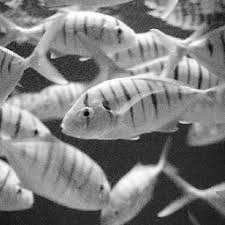

Espectro


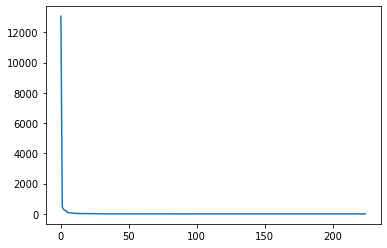

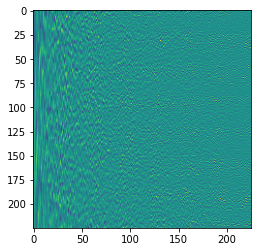

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

f = Image.open('./Images/jurel-dorado.jpg').convert('L') # convertimos a escala de grises
display(f)
A = np.asarray(f)/255.0

B = np.matmul(A.transpose(),A)
print('Espectro')
D, V = np.linalg.eig(B)
plt.plot(D)
plt.show()
plt.imshow(V)
plt.show()

Descomposicion SVD

In [7]:
U, S, V = np.linalg.svd(A)
display(Latex('$R = V \Sigma - AV^{t}$'))
R = np.matmul(U,np.diag(S)) - np.matmul(A,V.transpose())


norma_rec = np.linalg.norm(R, ord=2)
print('Norma de la reconstrucción: ')
display(norma_rec)

<IPython.core.display.Latex object>

Norma de la reconstrucción: 


3.0647878145864927e-13

U diagonaliza $AA^{t}$

In [8]:
r = np.matmul(A, A.transpose()) - np.matmul(np.matmul(np.matmul(U, np.diag(S)), np.diag(S).transpose()),U.transpose())
norm = np.linalg.norm(r, ord='fro')
print('Norma de la reconstrucción: ')
display(norm)

Norma de la reconstrucción: 


1.7704355746830063e-11

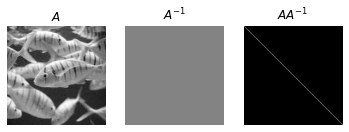

In [9]:
Ap = np.linalg.pinv(A)

fig, axs = plt.subplots(1,3)
axs[0].imshow(A, cmap='gray')
axs[0].axis('off')
axs[0].set_title('$A$')
axs[1].imshow(Ap, cmap='gray')
axs[1].axis('off')
axs[1].set_title('$A^{-1}$')
axs[2].imshow(np.matmul(Ap,A), cmap='gray')
axs[2].set_title('$AA^{-1}$')
axs[2].axis('off')
plt.show()


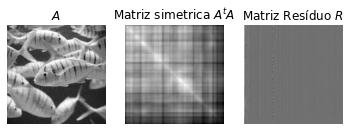

In [10]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(A, cmap='gray')
axs[0].axis('off')
axs[0].set_title('$A$')
axs[1].imshow(B, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Matriz simetrica $A^t A$')
axs[2].imshow(R, cmap='gray')
axs[2].set_title('Matriz Resíduo $R$')
axs[2].axis('off')

plt.show()

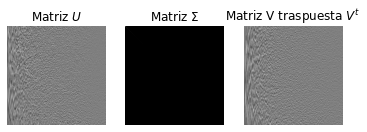

In [11]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(U, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Matriz $U$')
axs[1].imshow(np.diag(S), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Matriz $\Sigma$')
axs[2].imshow(V.transpose(), cmap='gray')
axs[2].set_title('Matriz V traspuesta $V^{t}$')
axs[2].axis('off')

plt.show()

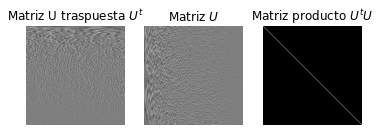

In [12]:
fig, axs = plt.subplots(1,3)
axs[0].imshow(U.transpose(), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Matriz U traspuesta $U^{t}$')
axs[1].imshow(U, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Matriz $U$')
axs[2].imshow(np.matmul(U.transpose(), U), cmap='gray')
axs[2].set_title('Matriz producto $U^{t}U$')
axs[2].axis('off')

plt.show()

4.2 Pseudo inversa
Propiedades: 
* $A = A pinv(A)A^{t}$, 
* $pinv(A) = pinv(A)A pinv(A)$, 
* $(A*pinv(A))^{t}-A pinv(A)$
* $(pinv(A) A)^t-pinv(A)A$

Ejemplo rango max


In [13]:
A = np.array([[1, 1], [1 ,2]])
A = Matrix(A)
m, n = A.shape

rango = A.rank()
A_p = A.pinv()
A_pi = A_p*A # es la inversa izq
A_pd = A*A_p # es la inversa derecha

f1 = (A.transpose()*A).inv()*A.transpose() # vale para rank=n
f2 = A.transpose()*(A*A.transpose()).inv() # vale para rank=m
epsilon = symbols('\epsilon')

A_r = A.transpose()*A + epsilon*np.eye(n)
A_s = A*A.transpose() + epsilon*np.eye(n)

Ainv_r = A_r.inv()
Ainv_s = A_s.inv()

print('A_r')
display(A_r)
print('A_s')
display(A_s)
print('Ainv_r')
display(Ainv_r)
print('Ainv_s')
display(Ainv_s)

L1_00 = limit((Ainv_r*A.transpose())[0,0], epsilon, 0)
L1_01 = limit((Ainv_r*A.transpose())[0,1], epsilon, 0)
L1_10 = limit((Ainv_r*A.transpose())[1,0], epsilon, 0)
L1_11 = limit((Ainv_r*A.transpose())[1,1], epsilon, 0)

fila1 = Matrix([L1_00]).col_insert(1, Matrix([L1_01]))
fila2 = Matrix([L1_10]).col_insert(1, Matrix([L1_11]))

res = fila1.row_insert(1,fila2)
print('A_inv derecha')
display(res)

L2_00 = limit((A.transpose()*Ainv_s)[0,0], epsilon, 0)
L2_01 = limit((A.transpose()*Ainv_s)[0,1], epsilon, 0)
L2_10 = limit((A.transpose()*Ainv_s)[1,0], epsilon, 0)
L2_11 = limit((A.transpose()*Ainv_s)[1,1], epsilon, 0)

fila1 = Matrix([L2_00]).col_insert(1, Matrix([L2_01]))
fila2 = Matrix([L2_10]).col_insert(1, Matrix([L2_11]))

res = fila1.row_insert(1,fila2)
print('A_inv izquierda')

display(res)



A_r


Matrix([
[1.0*\epsilon + 2,                3],
[               3, 1.0*\epsilon + 5]])

A_s


Matrix([
[1.0*\epsilon + 2,                3],
[               3, 1.0*\epsilon + 5]])

Ainv_r


Matrix([
[(3.0*\epsilon + 15.0)/(3.0*\epsilon**2 + 21.0*\epsilon + 3.0),                    9/(-3.0*\epsilon**2 - 21.0*\epsilon - 3)],
[                      3/(-1.0*\epsilon**2 - 7.0*\epsilon - 1), (1.0*\epsilon + 2.0)/(1.0*\epsilon**2 + 7.0*\epsilon + 1.0)]])

Ainv_s


Matrix([
[(3.0*\epsilon + 15.0)/(3.0*\epsilon**2 + 21.0*\epsilon + 3.0),                    9/(-3.0*\epsilon**2 - 21.0*\epsilon - 3)],
[                      3/(-1.0*\epsilon**2 - 7.0*\epsilon - 1), (1.0*\epsilon + 2.0)/(1.0*\epsilon**2 + 7.0*\epsilon + 1.0)]])

A_inv derecha


Matrix([
[ 2.0, -1.0],
[-1.0,  1.0]])

A_inv izquierda


Matrix([
[ 2.0, -1.0],
[-1.0,  1.0]])

Ejemplo: no hay rango maximo

In [14]:
import traceback

A = np.array([[1, 1], [1, 1]])
A = Matrix(A)
m, n = A.shape

rango = A.rank()

# Calculo pinv via SVD

U, S, V = np.linalg.svd(np.asarray(A, np.float32))

S_p = Matrix(np.diag(S)).pinv()

algoritmo = Matrix(V)*S_p*Matrix(U).transpose()

# calculo pseudo inversa via pinv
A_p = A.pinv()

(algoritmo - A_p).norm()

try:
    B1 = A_p*A # =VV' no es la inversa izq
    B2 = A*A_p # =UU'  no es la inversa derecha
    f1 = (A.transpose()*A).inv()*A.transpose() # vale para rank=n
    f2 = A.transpose()*(A*A.transpose()).inv() # vale para rank=m
except Exception:
    display(traceback.print_exc())

Traceback (most recent call last):
  File "/tmp/ipykernel_19180/78241313.py", line 25, in <module>
    f1 = (A.transpose()*A).inv()*A.transpose() # vale para rank=n
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/sympy/matrices/matrices.py", line 2199, in inv
    return _inv(self, method=method, iszerofunc=iszerofunc,
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/sympy/matrices/inverse.py", line 459, in _inv
    rv = M.inverse_GE(iszerofunc=iszerofunc)
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/sympy/matrices/matrices.py", line 2184, in inverse_GE
    return _inv_GE(self, iszerofunc=iszerofunc)
  File "/home/ivan/anaconda3/envs/fm/lib/python3.9/site-packages/sympy/matrices/inverse.py", line 245, in _inv_GE
    raise NonInvertibleMatrixError("Matrix det == 0; not invertible.")
sympy.matrices.common.NonInvertibleMatrixError: Matrix det == 0; not invertible.


None

La matrix es singular. Necesitamos regularización

In [15]:

# regularizacion
epsilon = symbols('\epsilon')

A_r = A.transpose()*A + epsilon*np.eye(n)
A_s = A*A.transpose() + epsilon*np.eye(n)

Ainv_r = A_r.inv()
Ainv_s = A_s.inv()

print('A_r')
display(A_r)
print('A_s')
display(A_s)
print('Ainv_r')
display(Ainv_r)
print('Ainv_s')
display(Ainv_s)

L1_00 = limit((Ainv_r*A.transpose())[0,0], epsilon, 0)
L1_01 = limit((Ainv_r*A.transpose())[0,1], epsilon, 0)
L1_10 = limit((Ainv_r*A.transpose())[1,0], epsilon, 0)
L1_11 = limit((Ainv_r*A.transpose())[1,1], epsilon, 0)

fila1 = Matrix([L1_00]).col_insert(1, Matrix([L1_01]))
fila2 = Matrix([L1_10]).col_insert(1, Matrix([L1_11]))

res = fila1.row_insert(1,fila2)
print('A_inv derecha')
display(res)

L2_00 = limit((A.transpose()*Ainv_s)[0,0], epsilon, 0)
L2_01 = limit((A.transpose()*Ainv_s)[0,1], epsilon, 0)
L2_10 = limit((A.transpose()*Ainv_s)[1,0], epsilon, 0)
L2_11 = limit((A.transpose()*Ainv_s)[1,1], epsilon, 0)

fila1 = Matrix([L2_00]).col_insert(1, Matrix([L2_01]))
fila2 = Matrix([L2_10]).col_insert(1, Matrix([L2_11]))

res = fila1.row_insert(1,fila2)
print('A_inv izquierda')

display(res)

# A_r=A'*A+epsilon*eye(n)
# A_s=A*A'+epsilon*eye(n)
# Ainv_r=inv(A_r)
# Ainv_s=inv(A_s)
# L1=limit(Ainv_r*A',0)
# L2=limit(A'*Ainv_s,0)
# %%
print('Evaluamos las propiedades')

display((A-A*A.pinv()*A.transpose()).norm(ord='fro'))
display((A.pinv()-A.pinv()*A*A.pinv()).norm(ord='fro'))
display(((A*A.pinv()).transpose()-A*A.pinv()).norm(ord='fro'))
display(((A.pinv()*A).transpose()-A.pinv()*A).norm(ord='fro'))

A_r


Matrix([
[1.0*\epsilon + 2,                2],
[               2, 1.0*\epsilon + 2]])

A_s


Matrix([
[1.0*\epsilon + 2,                2],
[               2, 1.0*\epsilon + 2]])

Ainv_r


Matrix([
[(2.0*\epsilon + 4.0)/(2.0*\epsilon**2 + 8.0*\epsilon),                   4/(-2.0*\epsilon**2 - 8.0*\epsilon)],
[                  2/(-1.0*\epsilon**2 - 4.0*\epsilon), (1.0*\epsilon + 2.0)/(1.0*\epsilon**2 + 4.0*\epsilon)]])

Ainv_s


Matrix([
[(2.0*\epsilon + 4.0)/(2.0*\epsilon**2 + 8.0*\epsilon),                   4/(-2.0*\epsilon**2 - 8.0*\epsilon)],
[                  2/(-1.0*\epsilon**2 - 4.0*\epsilon), (1.0*\epsilon + 2.0)/(1.0*\epsilon**2 + 4.0*\epsilon)]])

A_inv derecha


Matrix([
[0.25, 0.25],
[0.25, 0.25]])

A_inv izquierda


Matrix([
[0.25, 0.25],
[0.25, 0.25]])

Evaluamos las propiedades


0

0

0

0

Ejemplo: rango maximo

In [16]:
A = np.array([[2, 1], [0, 1], [-1, 0]]).transpose()
A = Matrix(A)
m, n = A.shape

rango = A.rank()

# Calculo pinv via SVD

U, S, V = np.linalg.svd(np.asarray(A, np.float32))
U = Matrix(U)
V = Matrix(V)
S = np.concatenate([np.diag(S), np.array([[0], [0]])],1) # añadimos fila de ceros para cuadrar dimensiones
S = Matrix(S)
S_p = S.pinv()

algoritmo = V*S_p*U.transpose()
display(algoritmo)

# calculo pseudo inversa via pinv
A_p = A.pinv()


# regularizacion
epsilon = symbols('\epsilon')

A_r = A.transpose()*A + epsilon*np.eye(n)
A_s = A*A.transpose() + epsilon*np.eye(m) 

Ainv_r = A_r.inv()
Ainv_s = A_s.inv()

L1_00 = limit((Ainv_r*A.transpose())[0,0], epsilon, 0)
L1_01 = limit((Ainv_r*A.transpose())[0,1], epsilon, 0)
L1_10 = limit((Ainv_r*A.transpose())[1,0], epsilon, 0)
L1_11 = limit((Ainv_r*A.transpose())[1,1], epsilon, 0)

fila1 = Matrix([L1_00]).col_insert(1, Matrix([L1_01]))
fila2 = Matrix([L1_10]).col_insert(1, Matrix([L1_11]))

res = fila1.row_insert(1,fila2)
print('A_inv derecha')
display(res)

L2_00 = limit((A.transpose()*Ainv_s)[0,0], epsilon, 0)
L2_01 = limit((A.transpose()*Ainv_s)[0,1], epsilon, 0)
L2_10 = limit((A.transpose()*Ainv_s)[1,0], epsilon, 0)
L2_11 = limit((A.transpose()*Ainv_s)[1,1], epsilon, 0)

fila1 = Matrix([L2_00]).col_insert(1, Matrix([L2_01]))
fila2 = Matrix([L2_10]).col_insert(1, Matrix([L2_11]))

res = fila1.row_insert(1,fila2)
print('A_inv izquierda')

display(res)

# A_r=A'*A+epsilon*eye(n)
# A_s=A*A'+epsilon*eye(n)
# Ainv_r=inv(A_r)
# Ainv_s=inv(A_s)
# L1=limit(Ainv_r*A',0)
# L2=limit(A'*Ainv_s,0)
# %%
print('Evaluamos las propiedades')

# display((A-A*A.pinv()*A.transpose()).norm(ord='fro'))
display((A.pinv()-A.pinv()*A*A.pinv()).norm(ord='fro'))
display(((A*A.pinv()).transpose()-A*A.pinv()).norm(ord='fro'))
display(((A.pinv()*A).transpose()-A.pinv()*A).norm(ord='fro'))

Matrix([
[ 0.414982978193929, 0.00336734975971961],
[-0.399999990420959,   0.799999980841918],
[0.0335029935781085,  -0.439683978943809]])

A_inv derecha


Matrix([
[ 0.333333333333333, 0.166666666666667],
[-0.333333333333333, 0.833333333333333]])

A_inv izquierda


Matrix([
[0.333333333333333, 0.166666666666667],
[             -1/3, 0.833333333333333]])

Evaluamos las propiedades


0

0

0

# Aplicaciones
SVD compression

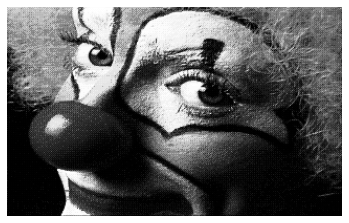

In [17]:
X = Image.open('Images/clown_gray.png')

X = np.asarray(X)
plt.imshow(X, cmap='gray')
plt.axis('off')
plt.show()

# realizo SVD
m, n = X.shape
U, S, V = np.linalg.svd(X)

Smat = np.zeros((m,n))
Smat[:len(S),:len(S)] = np.diag(S)

mu, nu = U.shape
mv, nv = V.shape

In [18]:
U.shape

(200, 200)

In [19]:
Smat.shape

(200, 320)

In [20]:
V.shape

(320, 320)

Rango de S


200

Ratio de compresión


0.24421875

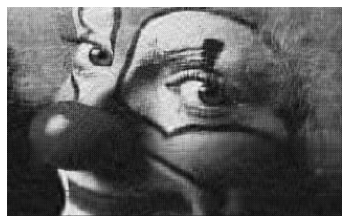

In [21]:
# fijo el numero de modos retenidos

r = 30
U_red = U[:,0:r]
S_red = Smat[0:r,0:r]
V_red = V[0:r,:]
rango = Matrix(Smat).rank()
print('Rango de S')
display(rango)

X_red = np.matmul(U_red, np.matmul(S_red, V_red))

size_orig = m*n
size_red = r*(m+n+1)
ratio_compression = r*(m+n+1)/(m*n) # me da el porcentaje retenido
print('Ratio de compresión')
display(ratio_compression)

plt.imshow(X_red, cmap='gray')
plt.axis('off')
plt.show()

Analisis de cada modo

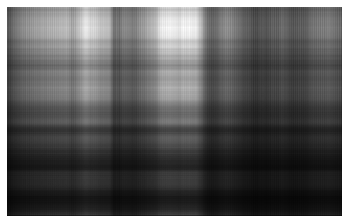

In [22]:
# Primer modo
p = 0
modo_p = U[:,p:p+1]*Smat[p:p+1,p:p+1]*V[p:p+1,:]
plt.imshow(modo_p, cmap='gray')
plt.axis('off')
plt.show()

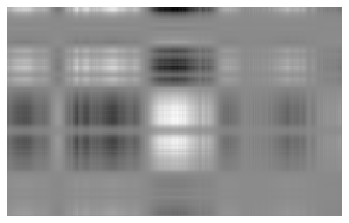

In [23]:
# Segundo modo
p = 1
modo_p = U[:,p:p+1]*Smat[p:p+1,p:p+1]*V[p:p+1,:]
plt.imshow(modo_p, cmap='gray')
plt.axis('off')
plt.show()

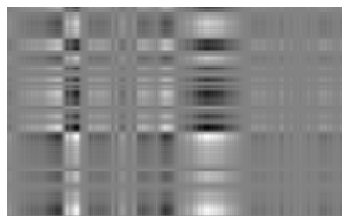

In [24]:
# Quinto modo
p = 4
modo_p = U[:,p:p+1]*Smat[p:p+1,p:p+1]*V[p:p+1,:]
plt.imshow(modo_p, cmap='gray')
plt.axis('off')
plt.show()

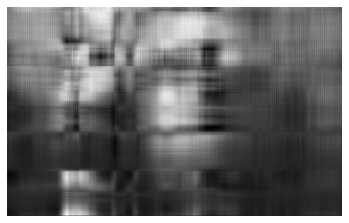

In [25]:
modos = 0
n_modos = 5
for i in range(n_modos):
    p = i
    modo_p = U[:,p:p+1]*Smat[p:p+1,p:p+1]*V[p:p+1,:]
    modos += modo_p
    
plt.imshow(modos, cmap='gray')
plt.axis('off')
plt.show()

# Ejemplo PCA universidad de stanford
Ejemplo SVD cuadro picasso

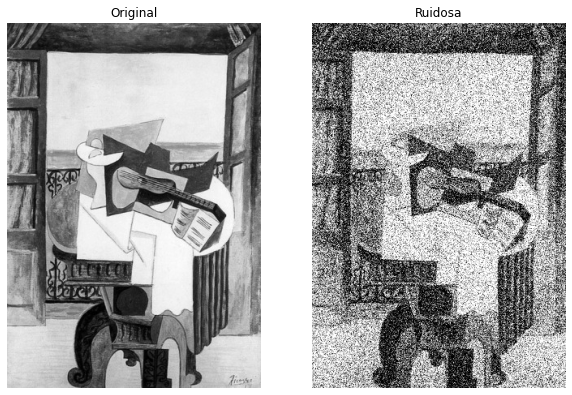

In [26]:
I = Image.open('Images/picasso-mesa-ventana.jpg').convert('L')
I = np.asarray(I)/255.0 # Imagen original
m, n = I.shape
In = I + 0.3*np.random.randn(m, n)
In = np.clip(In, a_min=0, a_max=1)

fig, axs = plt.subplots(1,2, figsize = (10,10))
axs[0].imshow(I, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(In, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Ruidosa')
plt.show()

Definimos la función Peak Signal Noise Ratio (PSNR)

In [27]:
def PSNR(original, noisy, max_pixel=1):
    mse = np.mean((original - noisy) ** 2)
    if(mse == 0): 
        return np.inf
    psnr = 20 * np.math.log10(max_pixel / sqrt(mse))
    return psnr

PSNR


12.277733737852943

PSNR


17.24266435589422

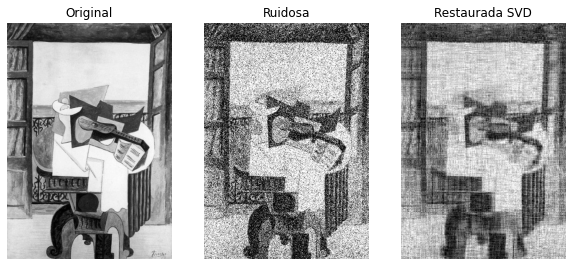

In [28]:
psnr = PSNR(I, In)
print('PSNR')
display(psnr)

# Descomposición SVD

U, S, V = np.linalg.svd(In)
Smat = np.zeros((m,n))
Smat[:len(S),:len(S)] = np.diag(S)

r = 25 # número de modos
U_red = U[:,0:r]
S_red = Smat[0:r,0:r]
V_red = V[0:r,:]

I_rec = np.matmul(U_red, np.matmul(S_red, V_red))
I_rec = np.clip(I_rec, a_min=0, a_max=1)
psnr = PSNR(I, I_rec)
print('PSNR')
display(psnr)

fig, axs = plt.subplots(1,3, figsize = (10,10))
axs[0].imshow(I, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(In, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Ruidosa')
axs[2].imshow(I_rec, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Restaurada SVD')
plt.show()

Vemos que la PSNR de la imagen aumenta. Aún así, la SVD es más utilizada para compresión que para denoising, pues visualmente, no percibimos una mejora que nos agrade.

# 4.2 Algebra Lineal. Teoria de los sistemas lineales 
Sistema Compatible Determinado

In [29]:
import time

A= np.array([[1, 2],
           [3,-4]])
display(A)
b= np.array([[3], [-1]])
display(b)

t = time.time()

sol = np.linalg.pinv(A)*b

elapsed = time.time() - t
print('Tiempo de ejecución: %.8f s' % elapsed)

t = time.time()

sol = np.linalg.inv(A)*b

elapsed = time.time() - t
print('Tiempo de ejecución: %.8f s' % elapsed)



array([[ 1,  2],
       [ 3, -4]])

array([[ 3],
       [-1]])

Tiempo de ejecución: 0.00014782 s
Tiempo de ejecución: 0.00010538 s


In [30]:
# Matrix más grande

m=1000
n=100
A = np.random.rand(m,n)
b = np.random.rand(m,1)

condicionamiento = np.linalg.cond(A)
print('Condicionamiento: %.2f' % condicionamiento)

t = time.time()

sol = np.linalg.pinv(A)@b # @ == np.matmul

elapsed = time.time() - t
print('Tiempo de ejecución: %.8f s' % elapsed)


t = time.time()

Matrix(np.concatenate([A,b],1)).rref() # Muy lento comparado con Matlab

elapsed = time.time() - t
print('Tiempo de ejecución: %.8f s' % elapsed)

Condicionamiento: 24.73
Tiempo de ejecución: 0.00325727 s
Tiempo de ejecución: 82.04484177 s


Estudio condicionamiento matriz de hilbert

In [31]:
from scipy.linalg import hilbert

n=16
A = hilbert(n)
exacta = np.ones((n,1)) # defino solucion exacta
b = A@exacta # calculo el b necesario
condicionamiento = np.linalg.cond(A)
print('Condicionamiento: %.2f' % condicionamiento)

# El mal condicionamiento nos da una solucion inaceptable (uso de np.linalg.inv())
t = time.time()

sol=np.linalg.inv(A)@b 
elapsed = time.time() - t
print('Solución:')
display(sol)
print('Tiempo de ejecución: %.8f s' % elapsed)


Condicionamiento: 786546777843164544.00
Solución:


array([[   -54.56919765],
       [   828.60131836],
       [ -4108.921875  ],
       [  9798.375     ],
       [-12252.        ],
       [  6944.        ],
       [  1040.        ],
       [  -864.        ],
       [ -8512.        ],
       [ 15600.        ],
       [-14304.        ],
       [  8280.        ],
       [ -2816.        ],
       [   384.        ],
       [    64.        ],
       [     0.        ]])

Tiempo de ejecución: 0.00827384 s


Perturbacion y Cota del error

In [32]:
delta=1e-6
db = delta*b # perturbacion de los datos
dbn = b+db; # datos ruidosos
x_per = np.linalg.inv(A)@dbn # solucion problema perturbado
display(x_per)


array([[-5.45692520e+01],
       [ 8.28602295e+02],
       [-4.10892188e+03],
       [ 9.79837500e+03],
       [-1.22520000e+04],
       [ 6.94400000e+03],
       [ 1.04000000e+03],
       [-8.64000000e+02],
       [-8.48000000e+03],
       [ 1.56000000e+04],
       [-1.43360000e+04],
       [ 8.28000000e+03],
       [-2.81600000e+03],
       [ 3.84000000e+02],
       [-6.40000000e+01],
       [ 8.00000000e+00]])

In [33]:
# Calculo de la cota de error
print('Cota del error')
cota=condicionamiento*np.linalg.norm(db)/np.linalg.norm(b)
display(cota)

print('Error relativo solucion calculada vs solucion exacta')
E_rsol = np.linalg.norm(sol-exacta)/np.linalg.norm(exacta)
display(E_rsol)
E_asol = np.linalg.norm(sol-exacta)
display(E_asol)


print('Error relativo solucion calculada vs solucion perturbada calculada')
E_rel = np.linalg.norm(sol-x_per)/np.linalg.norm(sol)
display(E_rel)
E = np.linalg.norm(sol-x_per)
display(E)


print('Error relativo solucion perturbada calculada vs solucion exacta')
E_r = np.linalg.norm(exacta-x_per)/np.linalg.norm(exacta)
display(E_r)
E_a = np.linalg.norm(exacta-x_per)
display(E_a)

Cota del error


786546777843.1647

Error relativo solucion calculada vs solucion exacta


7544.857580610396

30179.430322441585

Error relativo solucion calculada vs solucion perturbada calculada


0.004506380526104814

136.00000000351702

Error relativo solucion perturbada calculada vs solucion exacta


7546.402521274449

30185.610085097796

Sistemas lineales: Indeterminado

In [34]:
A = np.array([[1,2],[2,4]], np.float32)
b = np.array([[3],[6]], np.float32)

print('Rango de A')
display(np.linalg.matrix_rank(A))

A_amp = np.concatenate([A,b],1)
print('Rango de A ampliada')
display(np.linalg.matrix_rank(A_amp))



Rango de A


1

Rango de A ampliada


1

El rango de $A$ y de $A^*$ (Ampliada) es igual, luego el es un SCI $\to$ tiene infinitas soluciones

Obtengo una solución de apoyo

In [35]:
# x_s = np.linalg.inv(A)@b # daría error
x_p = np.linalg.pinv(A)@b
A@x_p == b

array([[ True],
       [ True]])

Construyo infinitas soluciones como combinación lineal del núcleo y esa solución

In [36]:
ker = Matrix(A).nullspace()[0]

alpha = symbols('alpha')
x_sol = x_p + alpha*ker
display(x_sol)

Matrix([
[0.6 - 2.0*alpha],
[    alpha + 1.2]])

Usando SVD

In [37]:
U, S, V = np.linalg.svd(A)
U = Matrix(U)
S = Matrix(S)
V = Matrix(V)

#% base del kernel de A:
display(V[:,1])
# base del rango de A:
display(U[:,0])
# valores singulares de A
display(S)
# verificamos la propiedad S == autovalores de A'*A:
av = np.sqrt(np.linalg.eigvals(A.transpose()@A))
av

Matrix([
[-0.894427],
[ 0.447214]])

Matrix([
[-0.447214],
[-0.894427]])

Matrix([
[        5.0],
[1.98603e-16]])

array([0., 5.], dtype=float32)

# 4.2.3 Regresión Lineal (Quarteroni)
Ejemplos de regresiones. Comparacion con la interpolacion

In [38]:
A = np.array([  [ 0,     1],
                [0.06,   1],
                [0.14,   1],
                [0.25,   1],
                [0.31,   1],
                [0.47,   1],
                [0.60,   1],
                [0.70,   1]])
m, n = A.shape
b= np.array([[0], [0.08], [0.14], [0.20], [0.23], [0.25], [0.28], [0.29]])

print('Rango de A')
display(np.linalg.matrix_rank(A))

A_amp = np.concatenate([A,b],1)
print('Rango de A ampliada')
display(np.linalg.matrix_rank(A_amp))

Rango de A


2

Rango de A ampliada


3

No existen soluciones. Optamos por la solución de mínimos cuadrados

In [39]:
x_sol = np.linalg.pinv(A)@b
x_sol

array([[0.37409893],
       [0.06544121]])

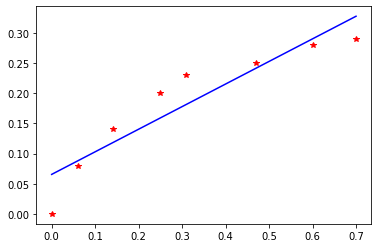

In [40]:
plt.plot(A[:,0], b, 'r*')
plt.plot(A[:,0], A@x_sol, 'b')
plt.show()

In [41]:

# %% Interpolacion con Matlab
# x=[2,3,4,5,6];
# y=[2,6,5,5,6];
# n=10
# %x=rand(1,n)
# %y=rand(1,n)
# grado_pol=length(x)-1
# %grado_pol=8
# pol=polyfit(x,y,grado_pol);  % coeficientes del polinomio
# xx=linspace(min(x),max(x));
# yy=polyval(pol,xx);
# %%
# figure
# plot(x,y,'.','markersize',20)
# hold on,
# plot(xx,yy)
# %% Interpolation and curve fitting
# % http://www.eas.uccs.edu/~mwickert/ece1010/lecture_notes/1010n6a.PDF
# clear all
# x = 0:5; % tiempos
# y = 1.61.*[0 10 25 36 52 59]; % velocidad en millas por horas pasada a km por horas
# x_new = 0:.01:5;
# y_new = interp1(x,y,x_new,'linear');
# %% 
# figure
# plot(x,y,'*')
# hold
# plot(x_new,y_new)
# title('Interpolacion: Velocidad vs Tiempo','fontsize',16) 
# ylabel('Km por horas','fontsize',14)
# xlabel('Tiempo, segundos','fontsize',14)
# %% estimacion
# y_new = interp1(x,y,1.5,'linear')
# %% interpolacion cubica
# clear all
# x = 0:5; % tiempos
# y = 1.61.*[0 10 25 36 52 59]; % velocidad en millas por horas pasada a km por horas
# x_new = 0:.01:5;
# y_new = interp1(x,y,x_new,'spline');
# figure
# plot(x,y,'d')
# legend off
# hold
# plot(x_new,y_new)
# title('Velocidad vs Tiempo','fontsize',16)
# ylabel('Km por horas','fontsize',14)
# xlabel('Tiempo, segundos','fontsize',14)
# legend('Data Points','Cubic Spline Interpolation')
# %% Curve Fitting
# x = 0:5;
#  y = [0 10 25 36 52 59];
#  x_ls = 0:0.01:5;
#  c_1=polyfit(x,y,1) % coeficientes de la regresion polinomica lineal
#  y1 = polyval(c_1,x_ls);
#  c_2=polyfit(x,y,2); % coeficientes de la regresion polinomica cuadratica
#  y2 = polyval(c_2,x_ls);
#  c_5=polyfit(x,y,5) % coeficientes de la regresion polinomica de grado 5
#  y5 = polyval(c_5,x_ls);
#  c_10=polyfit(x,y,10); % coeficientes de la regresion polinomica de grado 10
#  y10 = polyval(c_10,x_ls);
# %%
# figure
#  subplot(221) % aproximacion lineal
#  plot(x,y,'s')
#  hold
#  plot(x_ls,y1)
#  axis([0 5 0 60]); grid;
#  title('First-Degree (Linear) Fit','fontsize',16) 
#  ylabel('mph','fontsize',14)
#  subplot(222) % aproximacion cuadratica
#  plot(x,y,'s')
#  hold
#  plot(x_ls,y2)
#  axis([0 5 0 60]); grid;
#  title('Second-Degree Fit','fontsize',16)
#  ylabel('mph','fontsize',14)
#  subplot(223) % aproximacion grado 5
#  plot(x,y,'s')
#  hold
#  plot(x_ls,y5)
#  axis([0 5 0 60]); grid;
#  title('Fifth-Degree Fit','fontsize',16)
#  ylabel('mph','fontsize',14)
#  xlabel('Time-Seconds','fontsize',14)
#  subplot(224) % aproximacion grado 10
#  plot(x,y,'s')
#  hold
# plot(x_ls,y10)
# axis([0 5 0 60]); grid;
# title('Tenth-Degree Fit','fontsize',16) 
# ylabel('mph','fontsize',14)
# xlabel('Time-Seconds','fontsize',14)
# hold off
# %% Interpolacion vs Fitting
# x=0.5:0.5:3;
# y=[0.7,1.2,1.3,1.2,0.8,0.3];
# %%
# figure
# plot(x,y,'ro','markersize',4,'markerfacecolor','r')

# %regresion
# p=polyfit(x,y,2); %polinomio de segundo grado
# z=@(xx) polyval(p,xx);
# hold on
# fplot(z,[x(1),x(end)])

# %interpolacon
# z=@(xx) spline(x,y,xx);
# hold on
# fplot(z,[x(1),x(end)])

# hold off
# grid on
# legend('datos','regresion','interpolacion')
# xlabel('x')
# ylabel('y');
# title('Interpolacion vs regresion')